In [1]:
#
# Code to generate Figure 3
# 
# Note: need to run analysis_random_weights.ipynb first
import pickle
alldata = pickle.load( open( "data-3.p", "rb" ) )

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [4]:
import h5py as hd
pannuke= hd.File('/mnt/nas2/results/IntermediateResults/Camelyon/pannuke/patches_fix.hdf5', 'r', libver='latest', swmr=True)

In [5]:
# loop across types 
# loop across individual nuclei (with unique values)
values_ ={}
for type_ in [0,1,2,4]:
    print(type_)
    values_[type_]=[]
    for k in pannuke['pannuke/fold1'].keys():
        try:
            mask_=np.asarray(pannuke['pannuke/fold1/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
            lime_ = heatmap=alldata['fold1_{}'.format(k)][1]
            for i in np.unique(mask_):
                if i!=0:
                    #print(np.unique(lime_[mask_==i])) #we want to keep these values
                    values_[type_].append(np.unique(lime_[mask_==i])[0])
        except:
            pass
for type_ in [0,1,2,4]:
    print(type_)
    #values_[type_]=[]
    for k in pannuke['pannuke/fold2'].keys():
        try:
            mask_=np.asarray(pannuke['pannuke/fold2/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
            lime_ = heatmap=alldata['fold2_{}'.format(k)][1]
            for i in np.unique(mask_):
                if i!=0:
                    #print(np.unique(lime_[mask_==i])) #we want to keep these values
                    values_[type_].append(np.unique(lime_[mask_==i])[0])
        except:
            pass

0
1
2
4
0
1
2
4


In [6]:
type_=5
print(type_)
values_[type_]=[]
for k in pannuke['pannuke/fold1'].keys():
    try:
        mask_=np.asarray(pannuke['pannuke/fold1/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
        lime_ = heatmap=alldata['fold1_{}'.format(k)][1]
        for i in np.unique(mask_):
            if i!=0:
                #print(np.unique(lime_[mask_==i])) #we want to keep these values
                #import pdb; pdb.set_trace()
                for elem in np.unique(lime_[mask_==i])[:]:
                    values_[type_].append(elem)
                
    except:
        pass
type_=5
print(type_)
#values_[type_]=[]
for k in pannuke['pannuke/fold2'].keys():
    try:
        mask_=np.asarray(pannuke['pannuke/fold2/{}/tumor/center/mask'.format(k)][0,:,:,type_], dtype=np.uint8)
        lime_ = heatmap=alldata['fold2_{}'.format(k)][1]
        for i in np.unique(mask_):
            if i!=0:
                #print(np.unique(lime_[mask_==i])) #we want to keep these values
                for elem in np.unique(lime_[mask_==i])[:]:
                    values_[type_].append(elem)
    except:
        pass

5
5


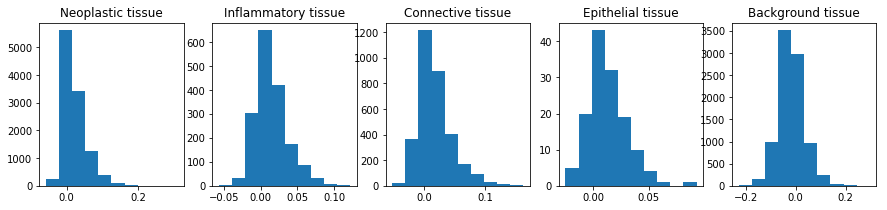

In [7]:
plt.rcParams['figure.figsize']=(15,3)
nuclei_types=['Neoplastic', 'Inflammatory', 'Connective', 'Epithelial', 'Background']
plt.figure()
i=1
for k in [0,1,2,4,5]:
    plt.subplot(1,5,i)
    plt.hist(values_[k])
    plt.title('{} tissue'.format(nuclei_types[i-1]))
    i+=1

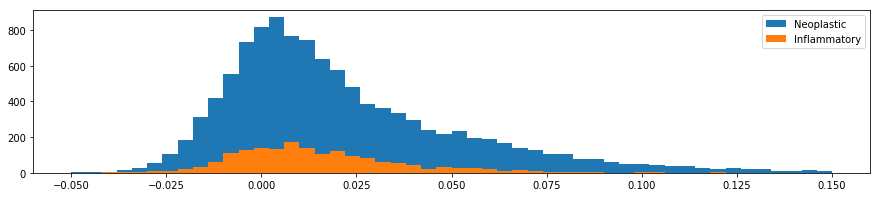

In [7]:
plt.rcParams['figure.figsize']=(15,3)
nuclei_types=['Neoplastic', 'Inflammatory', 'Connective', 'Epithelial', 'Background']
plt.figure()
i=1
for k in [0,1]:#,2,4]:#5]:
    #plt.subplot(1,5,i)
    plt.hist(values_[k][:], bins=50, range=(-0.05, 0.15) )
    #plt.title('{} tissue'.format(nuclei_types[i-1]))
    i+=1
plt.legend(nuclei_types)

In [8]:
print("0: Neoplastic cells, 1: Inflammatory, 2: Connective/Soft tissue cells, 3: Dead Cells, 4: Epithelial, 6: Background")
for k in [0,1,2,4]:
    print('Nuclei type: {}, average values of weights (std): {} ({})'.format(k, np.mean(values_[k]), np.std(values_[k])))
k=5
print('Background, average values of weights (std): {} ({})'.format(np.mean(values_[k]), np.std(values_[k])))

0: Neoplastic cells, 1: Inflammatory, 2: Connective/Soft tissue cells, 3: Dead Cells, 4: Epithelial, 6: Background
Nuclei type: 0, average values of weights (std): 0.02252296669514637 (0.03423288278705928)
Nuclei type: 1, average values of weights (std): 0.014736558680490678 (0.02238820934511609)
Nuclei type: 2, average values of weights (std): 0.017556236820071194 (0.027893092428723672)
Nuclei type: 4, average values of weights (std): 0.012422800708523047 (0.01781818067725783)
Background, average values of weights (std): -0.01771148904220094 (0.05228017454010978)


([<matplotlib.axis.XTick at 0x7efb70a91ac8>,
 <a list of 5 Text xticklabel objects>)

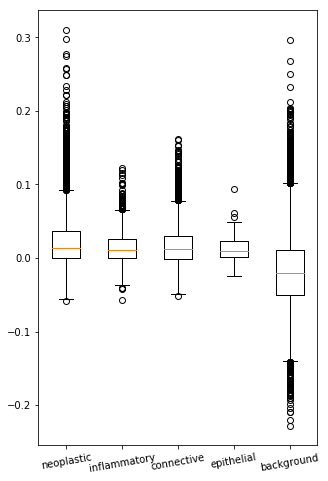

In [10]:
plt.rcParams['figure.figsize']=(5,8)
plt.figure()
#for k in range(5):
plt.boxplot([values_[k] for k in [0,1,2,4,5]], positions=np.arange(5))
#plt.title('Nuclei type: {}'.format(k))
plt.xticks(np.arange(5), ['neoplastic', 'inflammatory', 'connective', 'epithelial', 'background'], rotation=10)

In [12]:
# statistical testing of differences

In [9]:
import scipy.stats
print("Statistical testing of differences in mean: t-test for independent samples")
print("neoplastic-inflammatory: ", scipy.stats.ttest_ind(values_[0], values_[1])[0], scipy.stats.ttest_ind(values_[0], values_[1])[1])
print("neoplastic-connective", scipy.stats.ttest_ind(values_[0], values_[2])[0],scipy.stats.ttest_ind(values_[0], values_[2])[1])
print("neoplastic-epithelial", scipy.stats.ttest_ind(values_[0], values_[4])[0], scipy.stats.ttest_ind(values_[0], values_[4])[1])
print("neoplastic-background", scipy.stats.ttest_ind(values_[0], values_[5])[0], scipy.stats.ttest_ind(values_[0], values_[5])[1])

Statistical testing of differences in mean: t-test for independent samples
neoplastic-inflammatory:  9.131871080368523 7.731717150785369e-20
neoplastic-connective 7.5231504927330075 5.6655734576998867e-14
neoplastic-epithelial 3.422144452418658 0.0006235094579017875
neoplastic-background 65.47589748858574 0.0


In [10]:
import scipy.stats
print("Statistical testing of differences in mean: t-test for independent samples, unequal variance")
print("neoplastic-inflammatory: ", scipy.stats.ttest_ind(values_[0], values_[1], equal_var=False)[0], scipy.stats.ttest_ind(values_[0], values_[1], equal_var=False)[1])
print("neoplastic-connective", scipy.stats.ttest_ind(values_[0], values_[2], equal_var=False)[0],scipy.stats.ttest_ind(values_[0], values_[2], equal_var=False)[1])
print("neoplastic-epithelial", scipy.stats.ttest_ind(values_[0], values_[4], equal_var=False)[0], scipy.stats.ttest_ind(values_[0], values_[4], equal_var=False)[1])
print("neoplastic-background", scipy.stats.ttest_ind(values_[0], values_[5], equal_var=False)[0], scipy.stats.ttest_ind(values_[0], values_[5], equal_var=False)[1])

Statistical testing of differences in mean: t-test for independent samples, unequal variance
neoplastic-inflammatory:  12.351226441730933 2.9830333354558804e-34
neoplastic-connective 8.413353127576757 4.8876237400944257e-17
neoplastic-epithelial 6.420111497668945 1.7898496542510363e-09
neoplastic-background 62.71823882136545 0.0


In [11]:
import scipy.stats
print("Statistical testing of differences in mean: non-parametric Kruskal test for independent samples")
print("neoplastic-inflammatory: ", scipy.stats.kruskal(values_[0], values_[1])[0], scipy.stats.kruskal(values_[0], values_[1])[1])
print("neoplastic-connective", scipy.stats.kruskal(values_[0], values_[2])[0],scipy.stats.kruskal(values_[0], values_[2])[1])
print("neoplastic-epithelial", scipy.stats.kruskal(values_[0], values_[4])[0], scipy.stats.kruskal(values_[0], values_[4])[1])
print("neoplastic-background", scipy.stats.kruskal(values_[0], values_[5])[0], scipy.stats.kruskal(values_[0], values_[5])[1])

scipy.stats.kruskal(values_[0], values_[1])

Statistical testing of differences in mean: non-parametric Kruskal test for independent samples
neoplastic-inflammatory:  34.68661787282795 3.872847058905042e-09
neoplastic-connective 26.72971413215334 2.3399538590658491e-07
neoplastic-epithelial 5.811664360371651 0.015920220098720315
neoplastic-background 4157.926438283517 0.0


KruskalResult(statistic=34.68661787282795, pvalue=3.872847058905042e-09)

In [12]:
np.save("values.npy", values_)

([<matplotlib.axis.XTick at 0x7f1919e05ef0>,
 <a list of 5 Text xticklabel objects>)

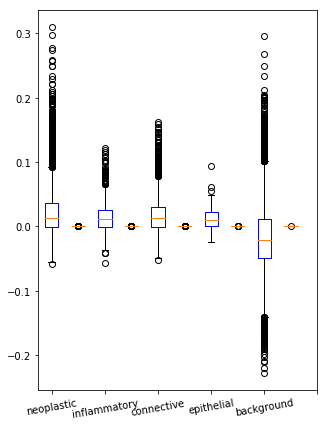

In [14]:
values_=np.load("values.npy",allow_pickle=True).item()
random_vals=np.load("random_val.npy", allow_pickle=True).item()
plt.rcParams['figure.figsize']=(5,7)
plt.figure()
#for k in range(5):
vect_=[]
for i in [0,1,2,4,5]:
    vect_.append(values_[i])
    vect_.append(random_vals[i])

plt.boxplot([vect_[i] for i in range(10)], positions=np.arange(10), boxprops=dict(color='blue'))

plt.xticks([0,2,4,6,8,10], ['neoplastic', 'inflammatory', 'connective', 'epithelial', 'background'], rotation=10)

In [22]:
import pandas as pd
v=pd.DataFrame((vect_))

In [129]:
v.transpose()
v_new=v.rename(columns={0:"neoplastic", 1:"neoplastic",2:"inflammatory",3:"inflammatory", 
                        4:"connective", 5:"connective", 6:"epithelial", 7:"epithelial",
                       8:"background", 9:"background"})

In [195]:
arr=[]
j=0
types=["neoplastic", "inflammatory", "connective", "epithelial", "background"]
for i in [0,2,4,6,8]:
    print(i)
    arr.append(np.concatenate(np.asarray(
                       [[types[j]]*(len(vect_[i])), [types[j]]*(len(vect_[i+1]))]
                   )))
    
    j+=1

0
2
4
6
8


In [155]:
data=pd.DataFrame({"type":np.concatenate([i*np.ones(len(vect_[i])) for i in range(10)]),
                  "values": np.concatenate([vect_[i] for i in range(10)]), 
                   "network_type": np.concatenate([np.zeros(len(vect_[0])), 
                                                  np.ones(len(vect_[1])),
                                                  np.zeros(len(vect_[2])), 
                                                   np.ones(len(vect_[3])),
                                                   np.zeros(len(vect_[4])), 
                                                  np.ones(len(vect_[5])),
                                                  np.zeros(len(vect_[6])), 
                                                   np.ones(len(vect_[7])),
                                                   np.zeros(len(vect_[8])), 
                                                   np.ones(len(vect_[9])),
                                                  ])
                  })

In [197]:
data=pd.DataFrame({"type":np.concatenate(np.asarray(arr)),
                  "values": np.concatenate([vect_[i] for i in range(10)]), 
                   "network_type": np.concatenate([["trained"]*(len(vect_[0])), 
                                                  ["random"]*(len(vect_[1])),
                                                  ["trained"]*(len(vect_[2])), 
                                                   ["random"]*(len(vect_[3])),
                                                   ["trained"]*(len(vect_[4])), 
                                                  ["random"]*(len(vect_[5])),
                                                  ["trained"]*(len(vect_[6])), 
                                                   ["random"]*(len(vect_[7])),
                                                   ["trained"]*(len(vect_[8])), 
                                                   ["random"]*(len(vect_[9])),
                                                  ])
                  })

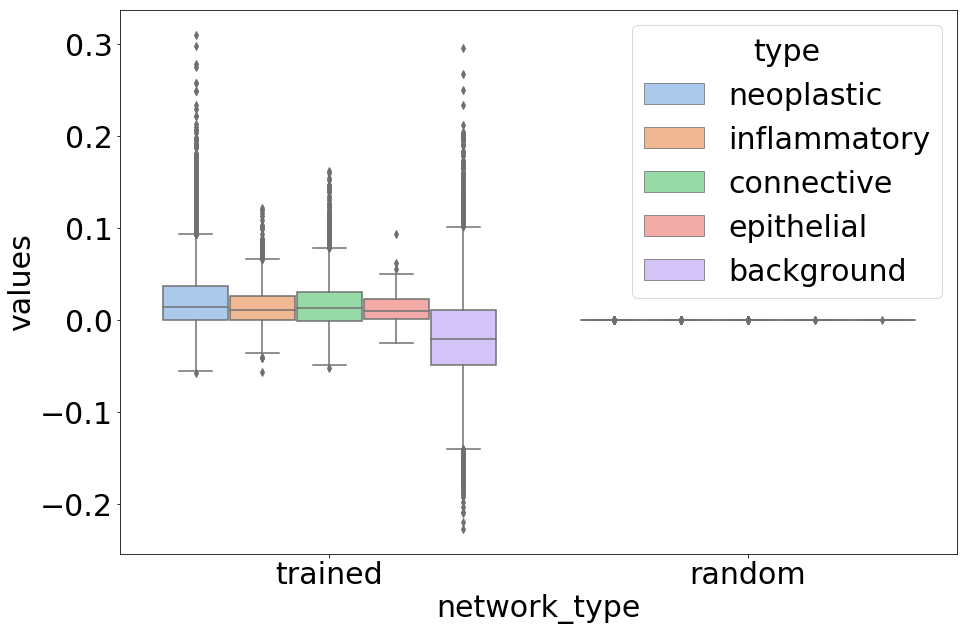

In [230]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size']=30
sns.boxplot(x="network_type", y="values", hue="type", data=data, palette="pastel")#, split=True)

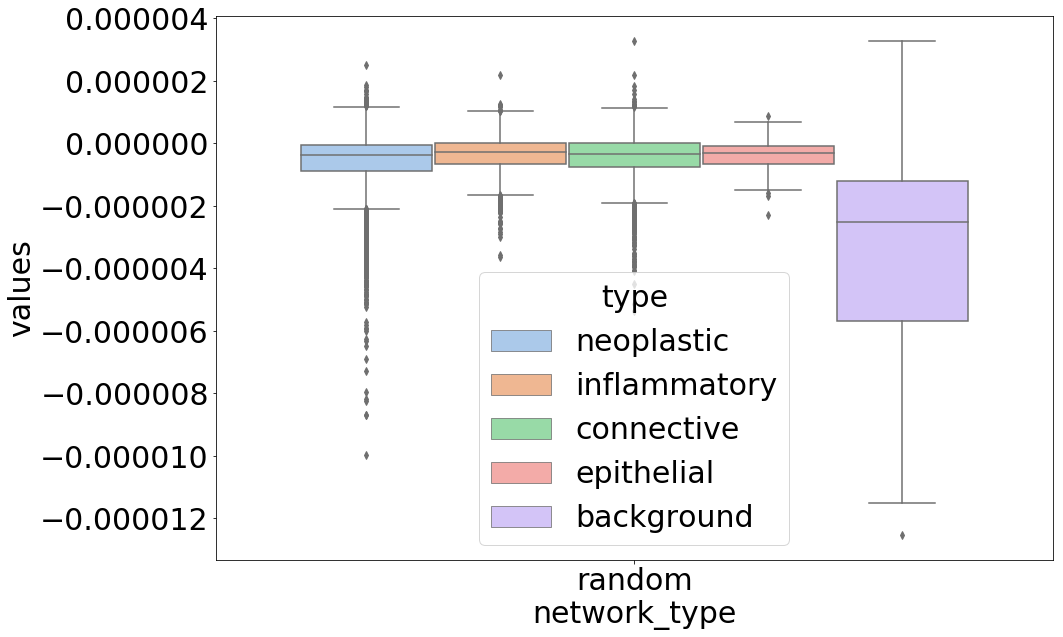

In [231]:
sns.boxplot(x="network_type", y="values", hue="type", data=data.where(data["network_type"]=="random"), palette="pastel")#, split=True)

In [221]:
data.where(data["network_type"]=="random"), data.where(data["network_type"]=="trained")

(      network_type        type        values
 0              NaN         NaN           NaN
 1              NaN         NaN           NaN
 2              NaN         NaN           NaN
 3              NaN         NaN           NaN
 4              NaN         NaN           NaN
 5              NaN         NaN           NaN
 6              NaN         NaN           NaN
 7              NaN         NaN           NaN
 8              NaN         NaN           NaN
 9              NaN         NaN           NaN
 10             NaN         NaN           NaN
 11             NaN         NaN           NaN
 12             NaN         NaN           NaN
 13             NaN         NaN           NaN
 14             NaN         NaN           NaN
 15             NaN         NaN           NaN
 16             NaN         NaN           NaN
 17             NaN         NaN           NaN
 18             NaN         NaN           NaN
 19             NaN         NaN           NaN
 20             NaN         NaN   

In [226]:
import scipy.stats
print("Statistical testing of differences in mean: non-parametric Kruskal test for independent samples")
print("neoplastic: ", scipy.stats.kruskal(values_[0], random_vals[0])[0], scipy.stats.kruskal(values_[0], random_vals[0])[1])
print("inflammatory:", scipy.stats.kruskal(values_[1], random_vals[1])[0],scipy.stats.kruskal(values_[1], random_vals[1])[1])
print("connective:", scipy.stats.kruskal(values_[2], random_vals[2])[0], scipy.stats.kruskal(values_[2], random_vals[2])[1])
print("epithelial:", scipy.stats.kruskal(values_[4], random_vals[4])[0], scipy.stats.kruskal(values_[4], random_vals[4])[1])
print("background:", scipy.stats.kruskal(values_[5], random_vals[5])[0], scipy.stats.kruskal(values_[5], random_vals[5])[1])


Statistical testing of differences in mean: non-parametric Kruskal test for independent samples
neoplastic:  4039.095187866653 0.0
inflammatory: 579.4344286129708 4.978564290781315e-128
connective: 939.8007201438377 2.186894642644126e-206
epithelial: 58.99261992619927 1.58264445164433e-14
background: 1642.195822535963 0.0


In [225]:
np.mean(values_[0]), np.mean(random_vals[0])

(0.02252296669514637, -5.765260718172456e-07)

In [227]:
import scipy.stats
print("Statistical testing of differences in mean: paired t-test for coupled samples")
print("neoplastic: ", scipy.stats.ttest_rel(values_[0], random_vals[0])[0], scipy.stats.kruskal(values_[0], random_vals[0])[1])
print("inflammatory:", scipy.stats.ttest_rel(values_[1], random_vals[1])[0],scipy.stats.kruskal(values_[1], random_vals[1])[1])
print("connective:", scipy.stats.ttest_rel(values_[2], random_vals[2])[0], scipy.stats.kruskal(values_[2], random_vals[2])[1])
print("epithelial:", scipy.stats.ttest_rel(values_[4], random_vals[4])[0], scipy.stats.kruskal(values_[4], random_vals[4])[1])
print("background:", scipy.stats.ttest_rel(values_[5], random_vals[5])[0], scipy.stats.kruskal(values_[5], random_vals[5])[1])


Statistical testing of differences in mean: non-parametric Kruskal test for independent samples
neoplastic:  69.28770121099072 0.0
inflammatory: 27.283392591620863 4.978564290781315e-128
connective: 35.628036766198555 2.186894642644126e-206
epithelial: 8.070868635174657 1.58264445164433e-14
background: -32.02009895098384 0.0
